# Cleaning and normalizing data

##Import packages

In [42]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import pickle
import matplotlib.pyplot as plt

##Import document as data frame

In [5]:
df_cleaned = pd.read_excel('./output/school_full_years_cleaned_data.xlsx',engine='openpyxl')
print(df_cleaned.shape)
df_cleaned.head()

(40634, 8)


,Unnamed: 0,ano,municipio,id_escola,nome_escola,aprovado,reprovado,abandono
0,0,2015,FERRAZ DE VASCONCELOS,908502,JOSE EDUARDO VIEIRA RADUAN DOUTOR,96.77,0.99,2.24
1,1,2015,FERRAZ DE VASCONCELOS,923291,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
2,3,2015,SUZANO,6993,ROBERTO BIANCHI,97.14,1.71,1.15
3,5,2015,SUZANO,7067,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
4,6,2015,SUZANO,7171,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33


In [6]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0', 'id_escola'])
df_cleaned

,ano,municipio,nome_escola,aprovado,reprovado,abandono
0,2015,FERRAZ DE VASCONCELOS,JOSE EDUARDO VIEIRA RADUAN DOUTOR,96.77,0.99,2.24
1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
2,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
3,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
4,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33
...,...,...,...,...,...,...
40629,2019,PILAR DO SUL,ODILON BATISTA JORDAO VEREADOR,98.10,0.95,0.95
40630,2019,PILAR DO SUL,ANCHIETA PADRE,98.98,0.41,0.61
40631,2019,PILAR DO SUL,MARIA APARECIDA RECHINELI MODANEZI PROFESSORA,93.26,5.70,1.04
40632,2019,SALTO DE PIRAPORA,AFONSO VERGUEIRO DOUTOR,86.44,12.50,1.06


##Removing lines with negative number

In [7]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(str)
df_cleaned = df_cleaned[df_cleaned["aprovado"].str.contains("-") == False]

df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(str)
df_cleaned = df_cleaned[df_cleaned["reprovado"].str.contains("-") == False]

df_cleaned['abandono'] = df_cleaned['abandono'].astype(str)
df_cleaned = df_cleaned[df_cleaned["abandono"].str.contains("-") == False]

print(df_cleaned.shape)
df_cleaned.head()

(40597, 6)


,ano,municipio,nome_escola,aprovado,reprovado,abandono
0,2015,FERRAZ DE VASCONCELOS,JOSE EDUARDO VIEIRA RADUAN DOUTOR,96.77,0.99,2.24
1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
2,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
3,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.0
4,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33


##Convert columns to float

In [8]:
df_cleaned['aprovado'] = df_cleaned['aprovado'].astype(float)
df_cleaned['reprovado'] = df_cleaned['reprovado'].astype(float)
df_cleaned['abandono'] = df_cleaned['abandono'].astype(float)

##Remove rows that have just 0 values and reset index

In [9]:
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns=['index'])

print(df_cleaned.shape)
df_cleaned.head()

(40597, 6)


,ano,municipio,nome_escola,aprovado,reprovado,abandono
0,2015,FERRAZ DE VASCONCELOS,JOSE EDUARDO VIEIRA RADUAN DOUTOR,96.77,0.99,2.24
1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72
2,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15
3,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00
4,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33


##Normalizing data

In [10]:
normalized_list = preprocessing.normalize([df_cleaned['ano'],df_cleaned['aprovado'],df_cleaned['reprovado'],df_cleaned['abandono']])

df_cleaned['ano_normalized'] = normalized_list[0]
df_cleaned['aprovado_normalized'] = normalized_list[1]
df_cleaned['reprovado_normalized'] = normalized_list[2]
df_cleaned['abandono_normalized'] = normalized_list[3]

print(df_cleaned.shape)
df_cleaned.head()

(40597, 10)


,ano,municipio,nome_escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
0,2015,FERRAZ DE VASCONCELOS,JOSE EDUARDO VIEIRA RADUAN DOUTOR,96.77,0.99,2.24,0.00496,0.000281,0.000022,0.000082
1,2015,FERRAZ DE VASCONCELOS,CONJUNTO HABITACIONAL PARQUE DOURADO II,75.62,20.66,3.72,0.00496,0.000219,0.000450,0.000136
2,2015,SUZANO,ROBERTO BIANCHI,97.14,1.71,1.15,0.00496,0.000282,0.000037,0.000042
3,2015,SUZANO,CARLOS MOLTENI PROFESSOR,90.33,9.67,0.00,0.00496,0.000262,0.000211,0.000000
4,2015,SUZANO,GIOVANNI BATTISTA RAFFO PROFESSOR DOUTOR,98.66,1.01,0.33,0.00496,0.000286,0.000022,0.000012


##Creating normalized file

In [11]:
df_cleaned.to_excel('./output/FluxoEscolarNormalizado.xlsx', encoding="utf-8")

# Start of creating the predictive model

##Choosing which municipality we want to analyze

In [27]:
df = pd.read_excel('./output/FluxoEscolarNormalizado.xlsx', engine='openpyxl')
df = df[df["municipio"] == "SAO PAULO"]
df.head()

,Unnamed: 0,ano,municipio,nome_escola,aprovado,reprovado,abandono,ano_normalized,aprovado_normalized,reprovado_normalized,abandono_normalized
2,1509,2015,SAO PAULO,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE RIO N...,8.11,91.89,30.12,0.004960,0.000024,0.002002,0.001102
3,5859,2016,SAO PAULO,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE RIO N...,8.82,91.18,0.00,0.004963,0.000026,0.001986,0.000000
16,4709,2016,SAO PAULO,JOAQUIM ADOLFO ARAUJO PROFESSOR,14.30,16.85,9.15,0.004963,0.000041,0.000367,0.000335
17,2831,2015,SAO PAULO,CLEMENTE QUAGLIO PROFESSOR,15.30,22.81,2.19,0.004960,0.000044,0.000497,0.000080
20,10192,2017,SAO PAULO,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE RIO N...,16.67,83.33,0.00,0.004965,0.000048,0.001815,0.000000


##Removing unnecessary columns

In [28]:
df = df.drop(['Unnamed: 0', 'ano', 'municipio', 'nome_escola', 'aprovado', 'reprovado', 'abandono', 'reprovado_normalized', 'abandono_normalized'], axis='columns')
print(df.shape)
df.head()

(6828, 2)


,ano_normalized,aprovado_normalized
2,0.004960,0.000024
3,0.004963,0.000026
16,0.004963,0.000041
17,0.004960,0.000044
20,0.004965,0.000048


#Scraping the data to decrease bias

In [29]:
random_df = df.sample(frac=1).reset_index(drop=True)
random_df.head()

,ano_normalized,aprovado_normalized
0,0.004968,0.000280
1,0.004965,0.000285
2,0.004975,0.000276
3,0.004953,0.000201
4,0.004963,0.000228


#Split the data frame between training and testing

In [30]:
train, test = train_test_split(random_df, test_size=0.3)

## Handling training data

#Split between predictors and classes

In [31]:
train.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples | #Get all labels from the target

In [32]:
x_df_train = train.iloc[:, :-1].values
y_df_train = train.iloc[:, -1].values

## Handling test data

#Split between predictors and classes

In [33]:
test.columns

Index(['ano_normalized', 'aprovado_normalized'], dtype='object')

#Get all the feature examples | #Get all labels from the target

In [34]:
x_df_test = test.iloc[:, :-1].values
y_df_test = test.iloc[:, -1].values

##Save variables

In [35]:
with open('students.pickle', mode='wb') as f:
    pickle.dump([x_df_train, y_df_train, x_df_test, y_df_test], f)

#Variable to compile percent error

In [36]:
height = []

# Test using Linear Regression Model

##Creating a linear regression object. Conducting training. Performing tests

In [37]:
regr = linear_model.LinearRegression()
regr.fit(x_df_train, y_df_train)
aprovados_y_pred = regr.predict(x_df_test)


##Coefficients. Mean absolute percentage error. Coefficient of determination: "1" is a perfect prediction.

In [38]:
print("Coefficients:", regr.coef_)
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_df_test, aprovados_y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_df_test, aprovados_y_pred))

Coefficients: [2.84976079]
Mean absolute percentage error: 0.12
Coefficient of determination: 0.34


##Plots

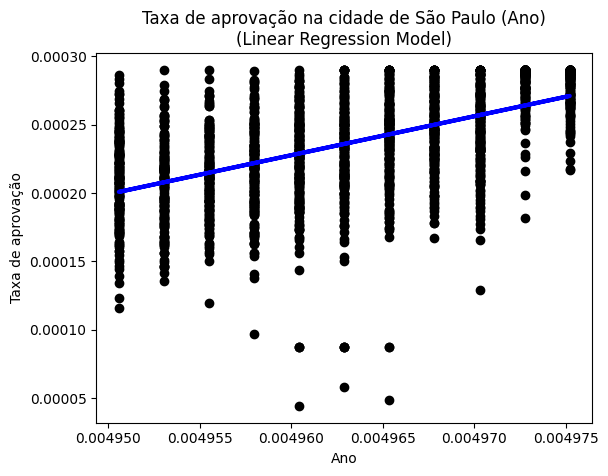

In [39]:
plt.scatter(x_df_test, y_df_test, color="black")
plt.plot(x_df_test, aprovados_y_pred, color="blue", linewidth=3)

plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Linear Regression Model)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

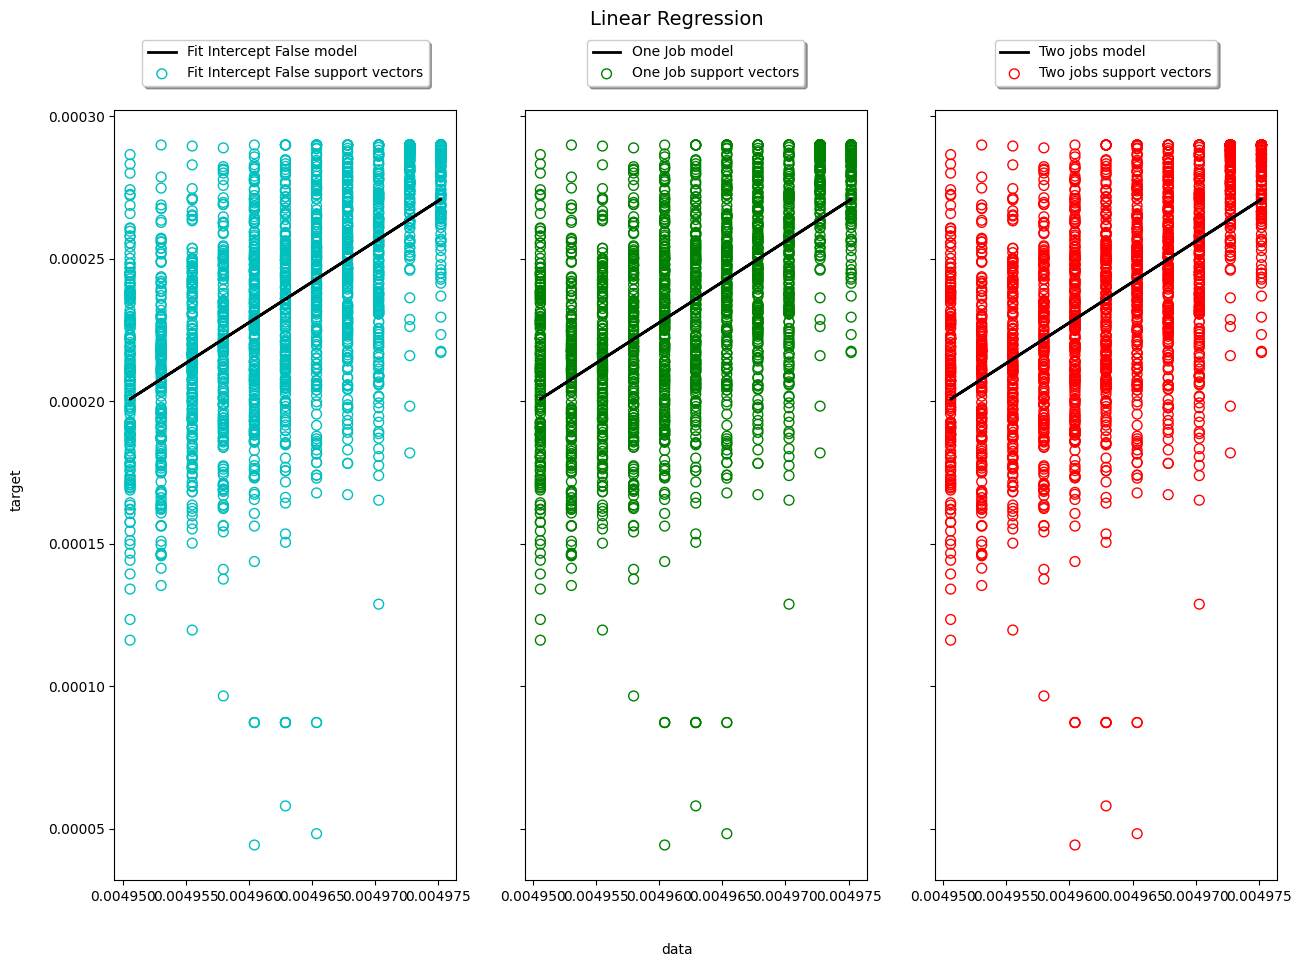

In [40]:
lw = 2

lr_fit_intercept_false = linear_model.LinearRegression(fit_intercept=False)
lr_fit_one_job = linear_model.LinearRegression(fit_intercept=False, n_jobs=1)
lr_fit_two_jobs = linear_model.LinearRegression(fit_intercept=False, n_jobs=2)

lrs = [lr_fit_intercept_false, lr_fit_one_job, lr_fit_two_jobs]
lrs_label = ["Fit Intercept False", "One Job", "Two jobs"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, lr in enumerate(lrs):
    prediction = regr.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(lrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(lrs_label[ix]),
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Linear Regression", fontsize=14)
plt.show()

### Random Forest

In [43]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_df_train, y_df_train)
Y_pred = model_RFR.predict(x_df_test)

mean_absolute_percentage_error(y_df_test, Y_pred)


0.11369819387644788

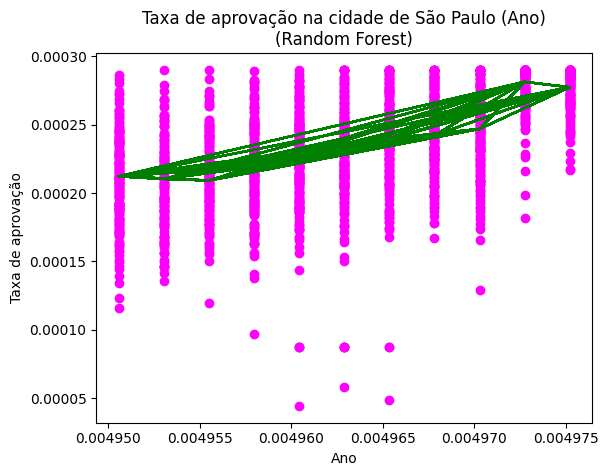

In [44]:
plt.scatter(x_df_test, y_df_test, color = 'magenta')
plt.plot(x_df_test, model_RFR.predict(x_df_test), color = 'green')
plt.title('Taxa de aprovação na cidade de São Paulo (Ano)\n(Random Forest)')
plt.ylabel("Taxa de aprovação")
plt.xlabel("Ano")
plt.show()

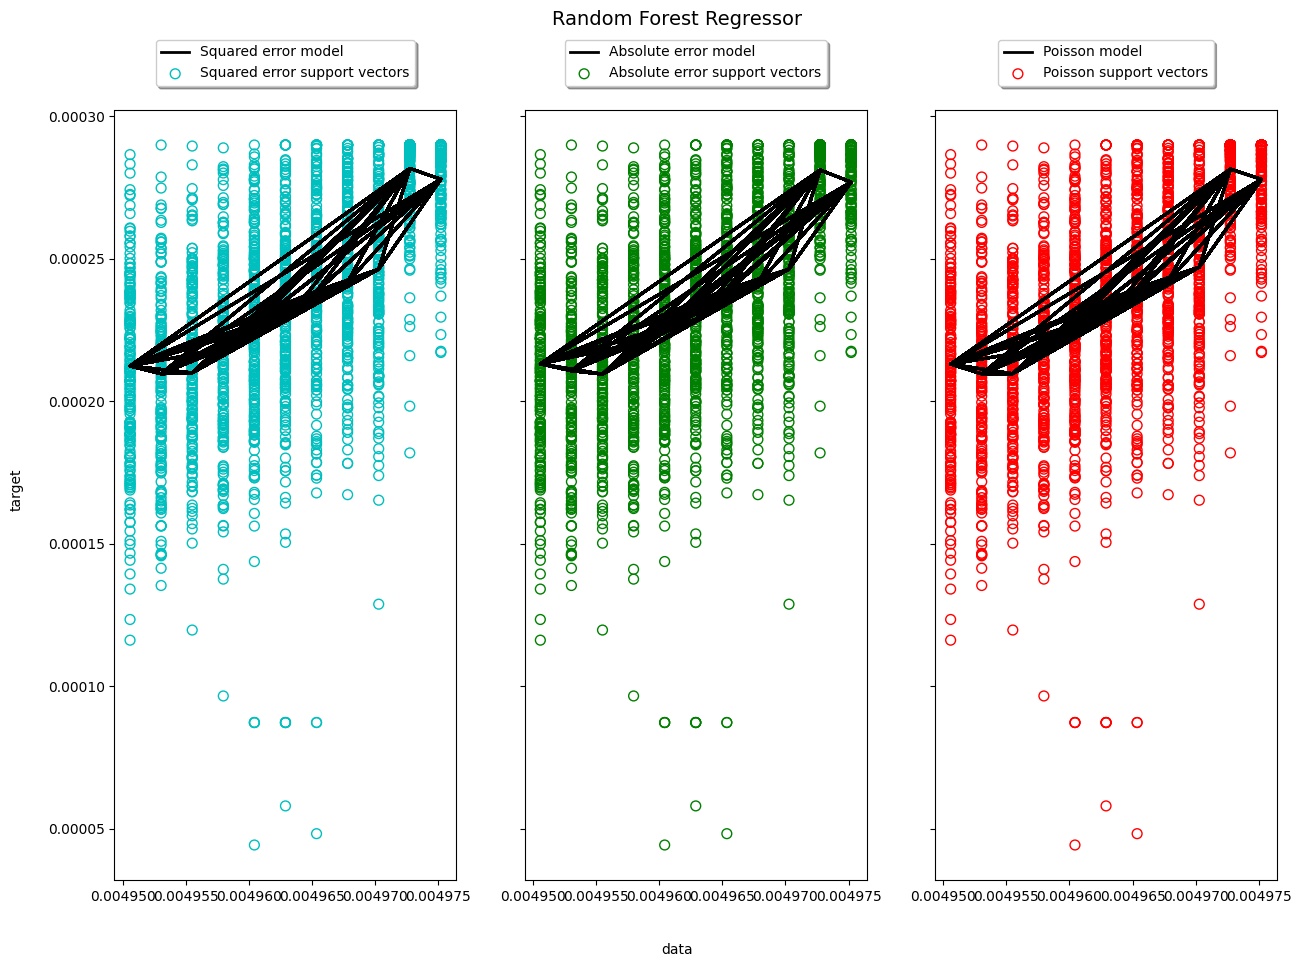

In [45]:
lw = 2

rfr_squared = RandomForestRegressor(n_estimators=10, criterion="squared_error")
rfr_absolute = RandomForestRegressor(n_estimators=10, criterion="absolute_error")
rfr_poisson = RandomForestRegressor(n_estimators=10, criterion="poisson")

rfrs = [rfr_squared, rfr_absolute, rfr_poisson]
rfrs_label = ["Squared error", "Absolute error", "Poisson"]
model_color = ["c", "g", "r"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, rfr in enumerate(rfrs):
    prediction = model_RFR.fit(x_df_train, y_df_train).predict(x_df_test)
    axes[ix].plot(
        x_df_test,
        prediction,
        color="k",
        lw=lw,
        label="{} model".format(rfrs_label[ix]),
    )
    axes[ix].scatter(
        x_df_test,
        y_df_test,
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(rfrs_label[ix]),
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

    mape = mean_absolute_percentage_error(y_df_test, prediction)
    height.append(mape)

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Random Forest Regressor", fontsize=14)
plt.show()

# Comparating models

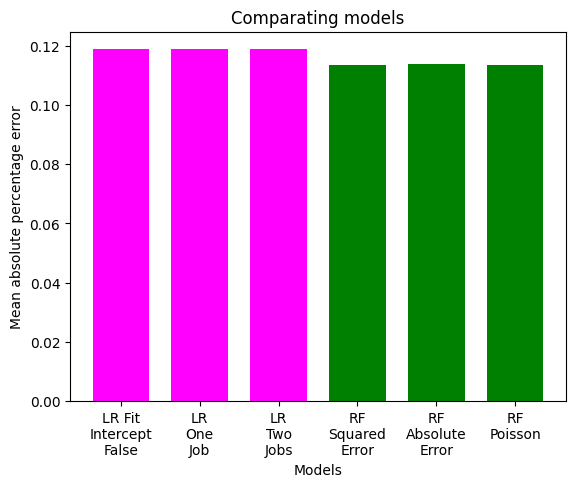

In [46]:

left = [0, 2.5, 5, 7.5, 10, 12.5]

tick_label = ['LR Fit\nIntercept\nFalse', 'LR\nOne\nJob', 'LR\nTwo\nJobs', 'RF\nSquared\nError', 'RF\nAbsolute\nError', 'RF\nPoisson']
plt.bar(left, height, tick_label = tick_label, width = 1.8, color = ['magenta', 'magenta', 'magenta',  'green', 'green', 'green'])
  
plt.xlabel('Models')
plt.ylabel('Mean absolute percentage error')
plt.title('Comparating models')
  
plt.show()

In [47]:
height

[0.11874632226489922,
 0.11874632226489922,
 0.11874632226489922,
 0.11354140975251094,
 0.11384603173378248,
 0.1136162666930803]